## Data Challenge -  Conversion Rate

The goal of this challenge is to build a model that predicts conversion rate and, based on the
model, come up with ideas to improve revenue.

## Challenge Description

We have data about users who hit our site: whether they converted or not as well as some of
their characteristics such as their country, the marketing channel, their age, whether they are
repeat users and the number of pages visited during that session (as a proxy for site
activity/time spent on site).

Your project is to:
- Predict conversion rate
- Come up with recommendations for the product team and the marketing team to improve conversion rate

## Columns:

- country : user country based on the IP address
- age : user age. Self-reported at sign-in step
- new_user : whether the user created the account during this session or had already an account and simply came back to the site
- source : marketing channel source
-- Ads: came to the site by clicking on an advertisement
-- Seo: came to the site by clicking on search results
-- Direct: came to the site by directly typing the URL on the browser
- total_pages_visited: number of total pages visited during the session. This is a proxy for time spent on site and engagement during the session.
- converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions / total sessions.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_context(rc={"figure.figsize": (10,5)})
sns.set(font_scale=2)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Data Exploration

In [67]:
# Importing data from a csv file to a dataframe 
df = pd.DataFrame.from_csv('conversion_data.csv', index_col=None)
df.columns = [col.strip() for col in df.columns.tolist()]
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [6]:
# Desribe data
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [7]:
# Get data types of the variables
df.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [8]:
# Check what country has highest convert rate
country = df.groupby(['country']).mean()
country.sort_values('converted', ascending=False)

,age,new_user,total_pages_visited,converted
country,,,,
Germany,30.449985,0.677237,5.190717,0.062500
UK,30.451538,0.679835,5.082167,0.052632
US,30.566482,0.681985,4.930160,0.037801
China,30.672972,0.698520,4.553523,0.001332


Germany has highest convert rate, followed by UK and US. The difference is not big. China has remarkedly lowest convert rate - ~30-60 time lower then the other countries. The company needs to research this phenomena.

In [9]:
# Get total number of users for each country
df.groupby(['country']).size().sort_values(ascending=False)

country
US         178092
China       76602
UK          48450
Germany     13056
dtype: int64

Germany has least number of user. China is second after US (more than 2 times difference). Considering about 3-4 times larger China population vs US, the company needs to work toward attracting more users in China in parallel with increasing the conversion rate.

In [10]:
# Get conversion rates for different marketing channel sources in diffenet countries
country_source = df.groupby(['country', 'source']).mean()
country_source.sort_values('converted', ascending=False)

age  new_user  total_pages_visited  converted
country source                                                     
Germany Ads     30.318351  0.674468             5.231649   0.066755
        Seo     30.529695  0.675373             5.201026   0.064055
UK      Ads     30.432978  0.681832             5.127238   0.055630
        Seo     30.466829  0.676022             5.099198   0.053905
Germany Direct  30.443785  0.685056             5.113827   0.053422
UK      Direct  30.441380  0.685563             4.991016   0.046267
US      Ads     30.528787  0.682872             4.957897   0.040580
        Seo     30.573261  0.681333             4.941464   0.038508
        Direct  30.597969  0.682291             4.872296   0.032909
China   Ads     30.650063  0.696628             4.563796   0.001484
        Direct  30.598694  0.698677             4.527286   0.001374
        Seo     30.720634  0.699532             4.559822   0.001224

It seems that advertisments work a little bit better than the other sources, though statistical analysis is required.

In [11]:
# Get total conversion rates for different marketing channel sources
source = df.groupby(['source']).mean()
source.sort_values(by='converted', ascending=False)

,age,new_user,total_pages_visited,converted
source,,,,
Ads,30.534742,0.685700,4.899538,0.034483
Seo,30.590835,0.684681,4.883946,0.032895
Direct,30.567978,0.686854,4.816901,0.028169


The same trend - direct typing of URL to find the site is least effective.

In [12]:
# Get total number of different marketing channel sources
df.groupby(['source']).size().sort_values(ascending=False)

source
Seo       155040
Ads        88740
Direct     72420
dtype: int64

Clicking on search results significantly prevails the other sources. The company needs to invest into search optimization.

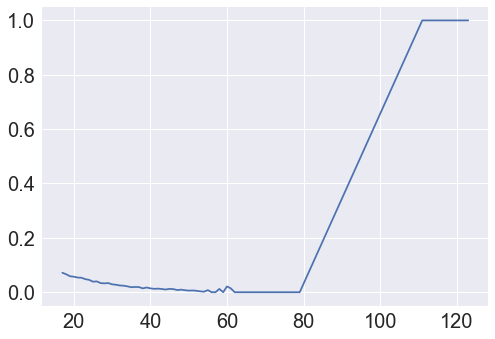

In [14]:
# Plotting the dependence of the conversion rate on age
age = df.groupby(['age']).mean()
age_sorted = age.reset_index().sort_values(by='age')
plt.plot(age_sorted.age, age_sorted.converted)

In [15]:
# Get total number of users for different ages
df.groupby(['age']).size().sort_values(ascending=False)

age
30     14346
28     14341
29     14158
27     14084
26     13931
31     13692
32     13507
25     13460
24     12960
33     12631
23     12336
34     12108
22     11701
35     11471
21     10966
36     10779
20     10156
37      9761
19      9349
38      8970
18      8466
39      8202
17      7597
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
77         1
79         1
111        1
73         1
72         1
123        1
dtype: int64

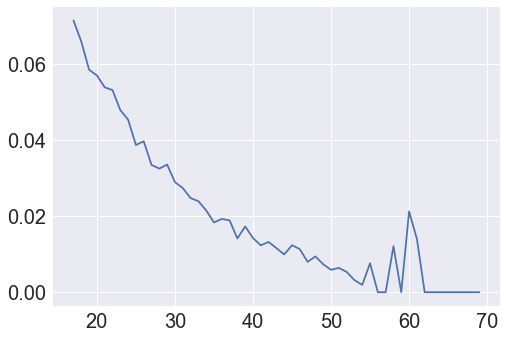

In [16]:
# Removing outliers (age > 70, 1 user for each 6 ages) with 100% conversion rate
plt.plot(age_sorted[age_sorted.age<70].age, age_sorted[age_sorted.age<70].converted)

The younger the user, the higher the conversion rate. Interesting spiked increase followed by a decrease around 55-62 years age.

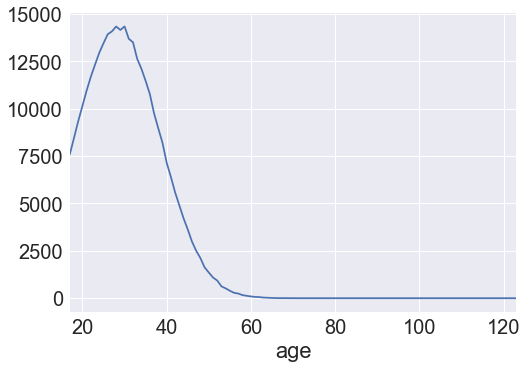

In [17]:
# Get the distribution of age among the users
df.groupby(['age']).size().plot()

In [18]:
# Get conversion rate for new and previous users
user = df.groupby(['new_user']).mean()
user.sort_values(by='converted', ascending=False)

,age,total_pages_visited,converted
new_user,,,
0,30.419140,5.280084,0.072002
1,30.639017,4.686155,0.014021


New users have about 7 time lower conversion rate

In [19]:
# Get total number of new and previous users
df.groupby(['new_user']).size().sort_values(ascending=False)

new_user
1    216744
0     99456
dtype: int64

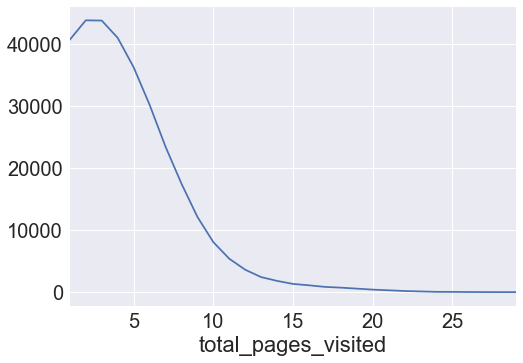

In [21]:
# Get the distribution of the number of pages visited by all users
df.groupby(['total_pages_visited']).size().plot()#.sort_values(ascending=False)

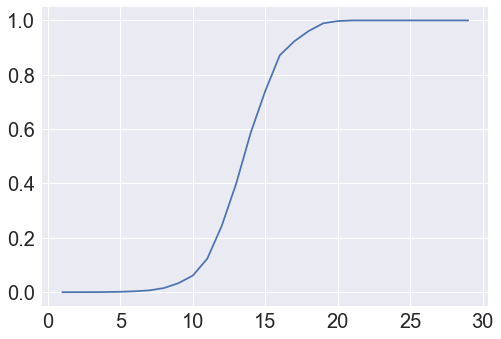

In [23]:
# Plotting the dependence of the conversion rate on the number of pages visited by users
user = df.groupby(['total_pages_visited']).mean()
user1 = user.reset_index()
plt.plot(user1.total_pages_visited, user1.converted)

Clear logistic dependence with saturation around 18 pages. The company needs to work on increasing the number of pages visted by users.

In [68]:
# Get average characteristics for the converted class
rate = df.groupby(['converted']).mean()
rate

,age,new_user,total_pages_visited
converted,,,
0,30.703961,0.698382,4.550281
1,26.546765,0.297941,14.553529


#### Conclusion:
Younger users previously visited the company web site and explored average about 14-15 pages have higher chances of being converted. The company needs to expand their marketing efforts on mid-age people, to attract users to visit the site again, and to promote the exploration of the site pages. 

## Predictive modeling

In [69]:
# Get total number of users in each conversion class
df.groupby(['converted']).size()

converted
0    306000
1     10200
dtype: int64

Large disbalance. I will try to do predictive modeling using the raw disbalanced data, and than I will downsample the dominant classand compare the results.

In [70]:
# Normalize predictors and labels, such that they contain only values between 0 and max-1

from sklearn.preprocessing import LabelEncoder

var_mod = df.columns.tolist()
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
# Check the data types
df.dtypes 

country                int64
age                    int64
new_user               int64
source                 int64
total_pages_visited    int64
converted              int64
dtype: object

In [71]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,2,8,1,0,0,0
1,3,6,1,2,4,0
2,3,11,1,2,3,0
3,0,22,1,2,4,0
4,3,13,1,2,5,0


In [28]:
df.describe()

,country,age,new_user,source,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000,316200.000000,316200.000000
mean,2.037419,13.569560,0.685465,1.209677,3.872966,0.032258
std,1.253855,8.269516,0.464331,0.852646,3.341104,0.176685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,13.000000,1.000000,1.000000,3.000000,0.000000
75%,3.000000,19.000000,1.000000,2.000000,6.000000,0.000000
max,3.000000,59.000000,1.000000,2.000000,28.000000,1.000000


In [29]:
# Creating a dataframe with features (predictors) to be analyzed
df_X = df.drop('converted', 1)

In [30]:
#Preparing arrays for ML analysis
X = df_X.values
Y = df['converted'].values

In [31]:
# Generating a random forests model with cross-validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight = 'balanced')

print('Cross-validation score')
r4 = []
kfold = KFold(n_splits=5)
for train_indices, test_indices in kfold.split(X):
    rf.fit(X[train_indices], Y[train_indices])
    r2 = cross_val_score(rf, X[test_indices], Y[test_indices], scoring = 'accuracy')
    r3 = np.mean(r2)
    r4.append(r3)
    print(r3)
average_accuracy = sum(r4)/5
print("Average accuracy : %s" % "{0:.3%}".format(average_accuracy))
print("Standard deviation : %s" % "{0:.3%}".format(np.std(r4)))

Cross-validation score
0.968548323287
0.968421884883
0.971521188328
0.968406138821
0.968975314768
Average accuracy : 96.917%
Standard deviation : 0.119%


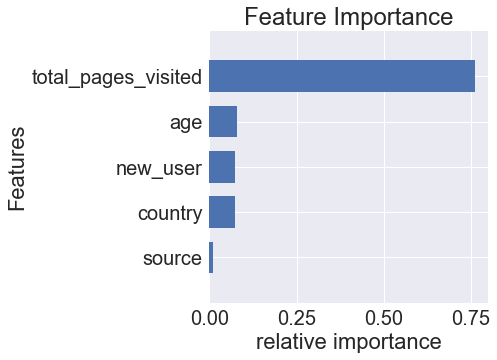

In [32]:
# Plotting ranked features
fimp = rf.feature_importances_
name_list = df_X.columns
fimp, name_list = zip(*sorted(zip(fimp, name_list)))
plt.figure(figsize = (5,5))
plt.barh(range(len(name_list)),fimp,align='center', height = 0.7)
plt.yticks(range(len(name_list)),name_list)
plt.ylim((-1, len(name_list)))
#plt.xlim((0, (int(max(fimp))+0.95)))
plt.xlabel('relative importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

Confusion matrix, without normalization
[[88325  3475]
 [  516  2544]]
Normalized confusion matrix
[[ 0.96  0.04]
 [ 0.17  0.83]]


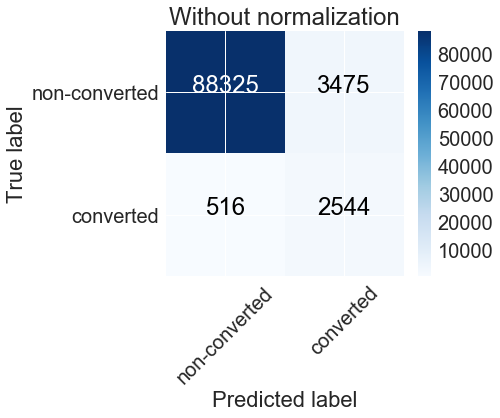

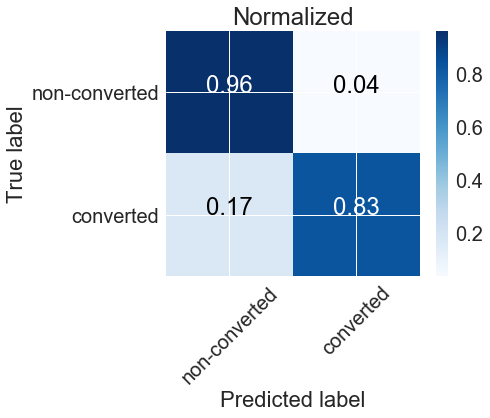

In [50]:
# Evaluating the performance of the RF classification model using confusion matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

class_names = ('non-converted', 'converted')

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=95, stratify=Y, test_size=0.3)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = RandomForestClassifier(n_estimators=100, class_weight = 'balanced')
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (7,6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Without normalization')

# Plot normalized confusion matrix
plt.figure(figsize = (7,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized')

plt.show()

In [72]:
# Evaluating the performance of the RF model via accuracy, precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.99      0.96      0.98     91800
          1       0.42      0.83      0.56      3060

avg / total       0.98      0.96      0.96     94860



In [74]:
from sklearn.metrics import average_precision_score

y_score = classifier.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_score[:, 1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.75


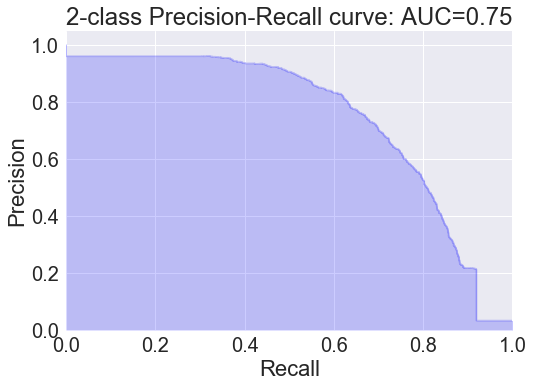

In [76]:
# Plotting the precision-recall dependence
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))

The RF classification model has a high accuracy, but it has low precision and high recall for the converted class due to imbalance.  Such a system returns many results, but most of its predicted labels are incorrect when compared to the training labels. I will now downsample the non-converted class to fix the imbalance.

In [77]:
df = pd.DataFrame.from_csv('conversion_data.csv', index_col=None)
df.columns = [col.strip() for col in df.columns.tolist()]
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [78]:
# Downsampling
df1 = df.drop(df[df['converted'] == 0].sample(frac=0.9666).index)

In [79]:
# Checking the balance now - good now
df1.groupby(['converted']).size()

converted
0    10220
1    10200
dtype: int64

#### Repeating the above steps for predictive modeling

In [81]:
from sklearn.preprocessing import LabelEncoder

var_mod = df1.columns.tolist()
le = LabelEncoder()
for i in var_mod:
    df1[i] = le.fit_transform(df1[i])
# Check the data types
df1.dtypes

country                int64
age                    int64
new_user               int64
source                 int64
total_pages_visited    int64
converted              int64
dtype: object

In [82]:
df_X = df1.drop('converted', 1)
X = df_X.values
Y = df1['converted'].values

In [83]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight = 'balanced')

print('Cross-validation score')
r4 = []
kfold = KFold(n_splits=5)
for train_indices, test_indices in kfold.split(X):
    rf.fit(X[train_indices], Y[train_indices])
    r2 = cross_val_score(rf, X[test_indices], Y[test_indices], scoring = 'accuracy')
    r3 = np.mean(r2)
    r4.append(r3)
    print(r3)
average_accuracy = sum(r4)/5
print("Average accuracy : %s" % "{0:.3%}".format(average_accuracy))
print("Standard deviation : %s" % "{0:.3%}".format(np.std(r4)))

Cross-validation score
0.929238132538
0.92189185272
0.922871164885
0.924334019176
0.931930791437
Average accuracy : 92.605%
Standard deviation : 0.388%


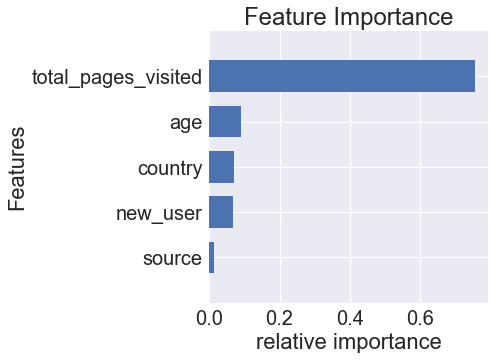

In [84]:
# Plotting ranked features
fimp = rf.feature_importances_
name_list = df_X.columns
fimp, name_list = zip(*sorted(zip(fimp, name_list)))
plt.figure(figsize = (5,5))
plt.barh(range(len(name_list)),fimp,align='center', height = 0.7)
plt.yticks(range(len(name_list)),name_list)
plt.ylim((-1, len(name_list)))
#plt.xlim((0, (int(max(fimp))+0.95)))
plt.xlabel('relative importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

Confusion matrix, without normalization
[[2835  231]
 [ 221 2839]]
Normalized confusion matrix
[[ 0.92  0.08]
 [ 0.07  0.93]]


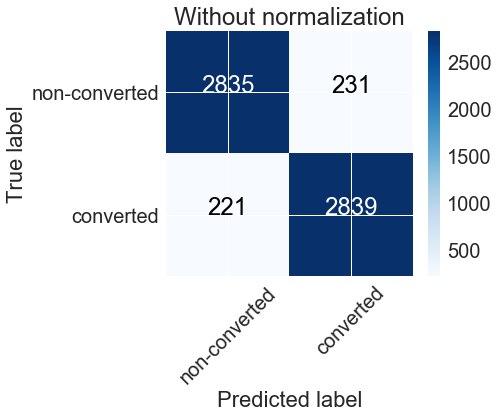

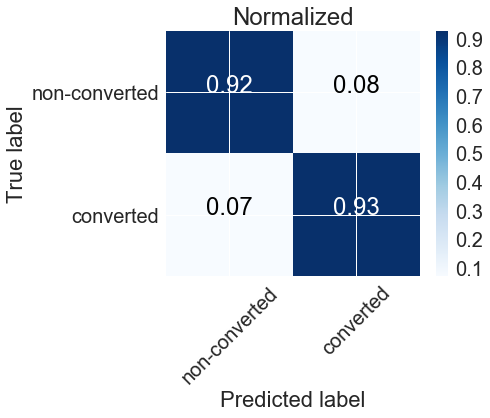

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

class_names = ('non-converted', 'converted')

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=95, stratify=Y, test_size=0.3)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = RandomForestClassifier(n_estimators=100, class_weight = 'balanced')
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (7,6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Without normalization')

# Plot normalized confusion matrix
plt.figure(figsize = (7,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized')

plt.show()

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.92      0.93      3066
          1       0.92      0.93      0.93      3060

avg / total       0.93      0.93      0.93      6126



In [87]:
from sklearn.metrics import average_precision_score

y_score = classifier.predict_proba(X_test)
average_precision = average_precision_score(y_test, y_score[:, 1])

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.97


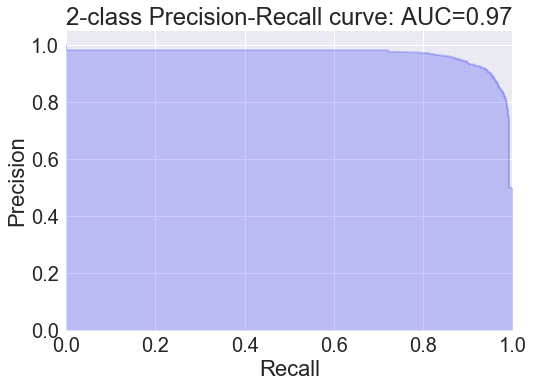

In [88]:
# Plotting the precision-recall dependence
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score[:, 1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))

Removing the disbalance decreased the accuracy of the RF model a little bit, but the precion-recall issue for the converted class has been fixed now, which significantly increased the AUC. I will now use Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.

In [91]:
df_X = df1.drop('converted', 1)
X = df_X.values
Y = df1['converted'].values

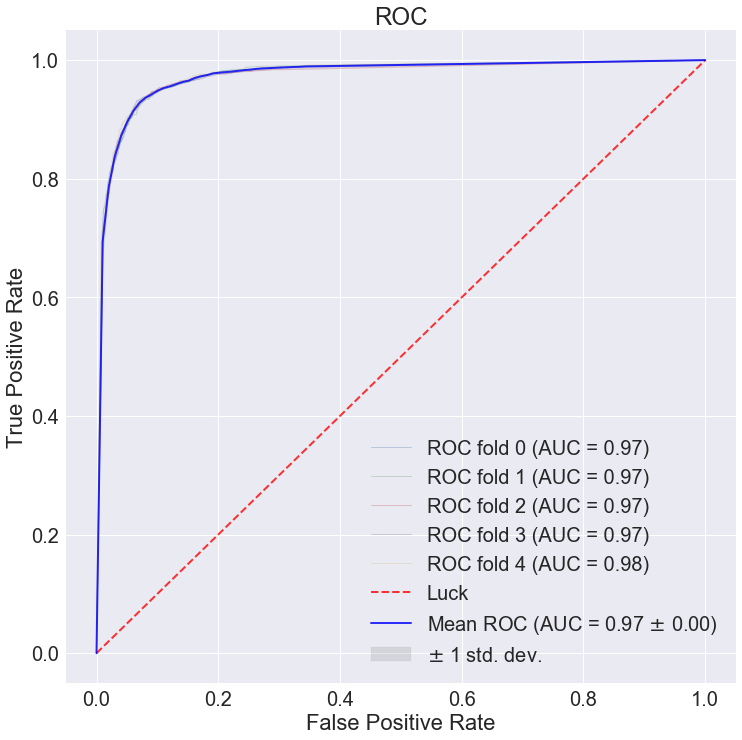

In [102]:
# Plotting the ROC curves for different foldes after kfold split (n=5) and calculating AUC for each fold
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

rf = RandomForestClassifier(n_estimators=100, class_weight = 'balanced')

# variables to store results for each fold
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots(1, 1, figsize=(12,12))

kfold = KFold(n_splits=5)
i = 0
for train, test in kfold.split(X):
    probas = rf.fit(X[train], Y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y[test], probas[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

There is no much variation in AUC values between different folds, and they are high.

## Conclusion:
The RF model predicts with high accuracy the conversion rate. The most important feature is the number of visited pages on the company site. Age, country and user type are much less important. The source importance is insignificant. The feature importance is in a very agreement with the conclusion based just on data exploration.